### Load Data

In [22]:
from keras.datasets import mnist
from keras.utils import to_categorical
from matplotlib import pyplot
(trainX, trainY), (OtestX, OtestY) = mnist.load_data()
trainX.shape

(60000, 28, 28)

### Show some samples from the training data

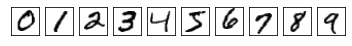

In [25]:
examples = []
for Y in range(10):
    for i in range(len(trainY)):
        if trainY[i] == Y:
            examples.append(trainX[i])
            break
for i in range(10):
    pyplot.subplot(1,10,i+1)
    fig = pyplot.imshow(255-examples[i], cmap=pyplot.get_cmap('gray'))
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
pyplot.show()

### Restructure data

In [3]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = OtestX.reshape((OtestX.shape[0], 28, 28, 1))
#CNN expect 3d image
trainY = to_categorical(trainY)
testY = to_categorical(OtestY)
trainY.shape

(60000, 10)

### Normalize the data to make it possible to operate on

In [4]:
#normalize images so pixel values are between 0 and 1
trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32")/255.0

### CREATE MODEL!

This has all of the different steps that were described in the writeup.

In [5]:
from keras.layers import *
from keras import Sequential
from keras.optimizers import SGD

ConvNum = 32
DenseLayerSize = 100

model = Sequential()
model.add(Conv2D(ConvNum, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(DenseLayerSize, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

### Show summary of model


This is a statistical model with 542,230 model parameters that need to be fit. Compared to the 2 parameters that need to be fit to a 2d linear regression, this is a bit more complex

In [6]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


### Train Model

I trained this for 10 epochs, which is 10 passes over the training data. I stopped at 10 because this appeared to maximize the accuracy.

In [7]:
numEpic = 10
history = model.fit(trainX, trainY, epochs=numEpic, batch_size=32,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.1621 - accuracy: 0.9511
Epoch 2/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0562 - accuracy: 0.9826
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0361 - accuracy: 0.9892
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0242 - accuracy: 0.9924
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0178 - accuracy: 0.9946
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0124 - accuracy: 0.9966
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0087 - accuracy: 0.9977
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0059 - accuracy: 0.9986
Epoch 9/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 10/10
60000/60000 [=============================

In [8]:
model.save('Model Saves/MNIST V1')

### Evaluating model performance

The model was trained on the training data and it is now being tested on the testing data, which it has never seen.

In [9]:
loss , acc = model.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

10000/10000 [==============================] - 1s 61us/step
> 98.840


### What is this chart?

This chart is a heatmap of problem areas for the model. On the X-axis it shows the actual number and on the Y-axis, it shows the predictions. The color reflect how many incorrect predictions there were with darker meaning more incorrect predictions.

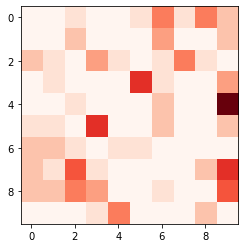

In [27]:
import numpy as np
wrong = np.zeros((10,10))
wrongPics = np.zeros((10,10),dtype = np.int32)
yPredict = model.predict(testX)
categories = np.argmax(yPredict,axis = 1)

for i, (predicted, actual) in enumerate(zip(categories,OtestY)):
    if predicted != actual:
        wrong[predicted,actual] += 1
        wrongPics[predicted,actual] = i
        
pyplot.imshow(wrong, cmap=pyplot.get_cmap('Reds'))
pyplot.show()

In [12]:
wrong

array([[0., 0., 2., 0., 0., 1., 2., 2., 2., 0.],
       [0., 0., 1., 1., 0., 1., 2., 1., 2., 0.],
       [1., 2., 0., 0., 1., 0., 1., 5., 4., 0.],
       [0., 0., 3., 0., 0., 6., 0., 1., 3., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 4.],
       [1., 0., 0., 6., 0., 0., 1., 0., 0., 0.],
       [4., 3., 1., 1., 2., 2., 0., 0., 1., 0.],
       [1., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 1., 0., 0., 0., 0., 2., 0., 2.],
       [2., 2., 0., 3., 9., 2., 0., 6., 5., 0.]])

In [15]:
wrongPics

array([[   0,    0, 8382,    0,    0, 6532, 7216, 6597, 9634,    0],
       [   0,    0, 3073, 3906,    0, 6572, 6783, 4201, 9540,    0],
       [1678, 4248,    0,    0, 7886,    0,  646, 9664, 8094,    0],
       [   0,    0, 4443,    0,    0, 4740,    0, 5734, 5973, 6023],
       [   0,    0,  247,    0,    0,    0, 3941,    0,    0, 8527],
       [3558,    0,    0, 5937,    0,    0, 9729,    0,    0,    0],
       [4814, 2654, 3853, 9679, 5199, 4536,    0,    0, 2995,    0],
       [5887,    0, 9015,    0,    0,    0,    0,    0,    0,    0],
       [4807,    0,  582,    0,    0,    0,    0, 4497,    0, 4639],
       [4163, 3503,    0, 6571, 4823, 2939,    0, 9642, 6173,    0]])

### Examples of incorrect predictions

This chart shows an example of each type of incorrect prediction. The spaces without pictures mean that there were no incorect predictions with those values. The actual value is on the X-axis. The predicted value is on the Y-axis.

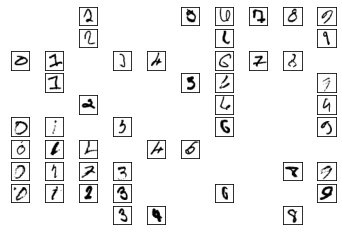

In [28]:
for i in range(10):
    for j in range(10): 
        if wrongPics[i][j] != 0:
            pyplot.subplot(10,10,i*10+j+1)
            fig = pyplot.imshow(1-testX[wrongPics[i][j]], cmap=pyplot.get_cmap('gray'))
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
pyplot.show()